In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
data=pd.read_csv('train.csv')

In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
data=data.drop(columns='Cabin')

In [58]:
mean_age=data['Age'].median()
mean_age

28.0

In [59]:
data['Age']=data['Age'].replace(np.nan,mean_age)

In [60]:
data=data.dropna()

In [61]:
len(data)

889

In [62]:
X=data[['Pclass','Sex','Age','Fare','SibSp','Parch','Embarked']]
Y=data['Survived']

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [64]:
num=X[['Age','Fare']]

In [65]:
b[:,0]

array([ 0.38623105,  1.37137004,  2.55353683, -0.20485235, -0.59890794,
       -1.2293969 ,  0.03158101, -0.28366347, -0.91415242, -0.67771906,
       -0.20485235,  1.29255892, -0.52009683,  2.63234795,  1.37137004,
       -0.44128571,  0.42563661, -0.67771906, -0.20485235,  1.2137478 ,
        2.001859  , -1.6234525 , -0.20485235, -0.67771906,  1.45018116,
        1.6078034 , -0.59890794, -0.55950239,  0.89850332, -0.20485235,
        1.6078034 , -0.44128571,  0.26801437, -0.20485235,  0.03158101,
       -0.87474686, -0.20485235, -0.67771906, -0.36247459, -0.20485235,
        0.74088109, -0.20485235,  0.89850332,  0.03158101,  1.2137478 ,
       -0.36247459,  1.2137478 , -0.20485235,  2.39591459,  0.50444773,
       -0.44128571, -0.20485235, -0.75653018, -0.12604123, -0.20485235,
       -1.54464138,  0.42563661, -0.36247459, -0.20485235,  0.50444773,
       -0.99296354,  0.18920325, -0.91415242, -0.59890794, -1.30820802,
       -0.20485235, -0.91415242,  1.37137004,  0.11039213,  2.39

In [66]:
b=scaler.fit_transform(num)

In [67]:
len(b[:,0])

889

In [68]:
X['Age']=b[:,0]

/Users/ritwikghosh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [69]:
X['Fare']=b[:,1]

/Users/ritwikghosh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [70]:
X['Age']

0     -0.563674
1      0.669217
2     -0.255451
3      0.438050
4      0.438050
5     -0.101340
6      1.902108
7     -2.104788
8     -0.178396
9     -1.180120
10    -1.950676
11     2.210331
12    -0.717785
13     0.746273
14    -1.180120
15     1.979164
16    -2.104788
17    -0.101340
18     0.129827
19    -0.101340
20     0.438050
21     0.360994
22    -1.103064
23    -0.101340
24    -1.642454
25     0.669217
26    -0.101340
27    -0.794841
28    -0.101340
29    -0.101340
         ...   
861   -0.640730
862    1.439774
863   -0.101340
864   -0.409563
865    0.977440
866   -0.178396
867    0.129827
868   -0.101340
869   -1.950676
870   -0.255451
871    1.362718
872    0.283939
873    1.362718
874   -0.101340
875   -1.103064
876   -0.717785
877   -0.794841
878   -0.101340
879    2.056219
880   -0.332507
881    0.283939
882   -0.563674
883   -0.101340
884   -0.332507
885    0.746273
886   -0.178396
887   -0.794841
888   -0.101340
889   -0.255451
890    0.206883
Name: Age, Length: 889, 

In [71]:
X=X.astype({'Pclass':'category','Sex':'category','SibSp':'category','Parch':'category','Embarked':'category','Age':'float','Fare': 'float'})

In [72]:
X['Sex']=X['Sex'].replace('male',0)
X['Sex']=X['Sex'].replace('female',1)
X['Embarked']=X['Embarked'].replace('S',0)
X['Embarked']=X['Embarked'].replace('C',1)
X['Embarked']=X['Embarked'].replace('Q',2)

In [73]:
X.head()

,Pclass,Sex,Age,Fare,SibSp,Parch,Embarked
0,3,0,-0.563674,-0.500240,1,0,0
1,1,1,0.669217,0.788947,1,0,1
2,3,1,-0.255451,-0.486650,0,0,0
3,1,1,0.438050,0.422861,1,0,0
4,3,0,0.438050,-0.484133,0,0,0


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=1)

In [75]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
y_pred=clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7865168539325843

# Iterating hyperparameters

In [307]:
param_dict={
    "criterion" : ["gini","entropy"],
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,None],
    "max_features" : ["auto","sqrt","log2",None],
    "min_samples_leaf" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,None],
    "min_samples_split" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,None]
}

In [308]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf, param_grid=param_dict, cv=10, n_jobs=-1)

In [309]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='d...
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [

In [310]:
grid.best_score_

0.8396322378716745

In [311]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=13,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# using entire dataset

In [312]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf, param_grid=param_dict, cv=10, n_jobs=-1)

In [313]:
grid.fit(X,Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='d...
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [

In [314]:
grid.best_score_

0.8346271705822266

In [315]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# using estimators

In [229]:
clf1=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=13,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [136]:
clf2=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [434]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=13,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [435]:
y_pred1=clf1.predict(X_test)

In [436]:
accuracy_score(y_test,y_pred1)

0.7921348314606742

In [419]:
clf2.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [420]:
y_pred2=clf2.predict(X_test)

In [421]:
accuracy_score(y_test,y_pred2)

0.8539325842696629

In [42]:
len(y_pred2)

143

# predicting using decision trees

In [38]:
test=pd.read_csv('test.csv')

In [39]:
copy=test

In [40]:
copy=copy.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [41]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB


In [42]:
mean_age=copy['Age'].median()
mean_age
copy['Age']=copy['Age'].replace(np.nan,mean_age)
mean_fare=copy['Fare'].median()
mean_age
copy['Fare']=copy['Fare'].replace(np.nan,mean_fare)

In [43]:
num=copy[['Age','Fare']]
scaler=StandardScaler()
b=scaler.fit_transform(num)

In [44]:
copy['Age']=b[:,0]
copy['Fare']=b[:,1]

In [45]:
copy['Sex']=copy['Sex'].replace('male',0)
copy['Sex']=copy['Sex'].replace('female',1)
copy['Embarked']=copy['Embarked'].replace('S',0)
copy['Embarked']=copy['Embarked'].replace('C',1)
copy['Embarked']=copy['Embarked'].replace('Q',2)

In [46]:
copy=copy.astype({'Pclass':'category','Sex':'category','SibSp':'category','Parch':'category','Embarked':'category','Age':'float','Fare': 'float'})

In [412]:
pred=clf1.predict(copy)

In [413]:
final=pd.DataFrame(list(zip(test['PassengerId'].values.tolist(),pred)), columns=['PassengerId','Survived'])

In [414]:
final=final.set_index('PassengerId')

In [415]:
final.to_csv('titanic_prediction_decisiontree.csv')

# using knn

In [27]:
np.sqrt(X_train.shape[0])

26.664583251946766

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
accuracy=[]
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [30]:
accuracy

[0.8033707865168539,
 0.797752808988764,
 0.8089887640449438,
 0.8089887640449438,
 0.8089887640449438,
 0.797752808988764,
 0.7921348314606742,
 0.7752808988764045,
 0.7752808988764045,
 0.7696629213483146,
 0.797752808988764,
 0.8033707865168539,
 0.8033707865168539,
 0.7921348314606742,
 0.8202247191011236,
 0.8089887640449438,
 0.8146067415730337,
 0.8089887640449438,
 0.8033707865168539,
 0.8089887640449438,
 0.8146067415730337,
 0.8089887640449438,
 0.8033707865168539,
 0.797752808988764,
 0.8033707865168539,
 0.7921348314606742,
 0.797752808988764,
 0.797752808988764,
 0.7921348314606742,
 0.7808988764044944,
 0.7921348314606742,
 0.7865168539325843,
 0.7865168539325843,
 0.7752808988764045,
 0.7640449438202247,
 0.7471910112359551,
 0.7584269662921348,
 0.7471910112359551,
 0.7528089887640449,
 0.7471910112359551,
 0.7584269662921348,
 0.7528089887640449,
 0.7584269662921348,
 0.7528089887640449,
 0.7471910112359551,
 0.7415730337078652,
 0.7415730337078652,
 0.7359550561797753

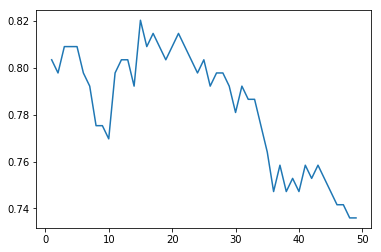

In [31]:
plt.plot(range(1,50),accuracy)

In [32]:
max(accuracy)

0.8202247191011236

In [76]:
accuracy.index(max(accuracy))

14

In [77]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [78]:
accuracy_score(y_test,knn.predict(X_test))

0.8146067415730337

In [79]:
predknn=knn.predict(copy)

In [80]:
kfinal=pd.DataFrame(list(zip(test['PassengerId'].values.tolist(),predknn)), columns=['PassengerId','Survived'])

In [81]:
kfinal=kfinal.set_index('PassengerId')

In [82]:
kfinal.to_csv('titanic_prediction_knn.csv')